In [127]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv('../input/breast-cancer-gene-expression-cumida/Breast_GSE45827.csv')

data.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,84,basal,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,...,12.229711,11.852955,13.658701,13.477698,6.265781,5.016196,4.901594,2.966657,3.508495,3.301999
1,85,basal,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,...,12.178531,11.809408,13.750086,13.470146,6.771853,5.291005,5.405839,2.934763,3.687666,3.064299
2,87,basal,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,...,12.125108,11.725766,13.621732,13.295080,6.346952,5.171403,5.184286,2.847684,3.550597,3.158535
3,90,basal,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,...,12.111235,11.719215,13.743108,13.508861,6.610284,5.193356,5.086569,3.031602,3.524981,3.272665
4,91,basal,9.408330,7.746404,6.693980,7.333426,3.169923,7.610457,5.372469,4.424426,...,12.173642,11.861296,13.797774,13.542206,6.414354,5.040202,5.235318,2.956232,3.445501,3.193947


In [143]:
data.shape

(151, 54677)

In [ ]:
data['type'] = data['type'].replace(['basal'],1)
data['type'] = data['type'].replace(['basal'],1)
data['type'] = data['type'].replace(['basal'],1)
data['type'] = data['type'].replace(['basal'],1)

In [144]:
x = data.iloc[:,2:]
y = data['type']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)

In [145]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

x_train[:5]

array([[ 1.58453103, -0.46535113, -0.62488871, ...,  1.44024535,
         1.62618176, -0.3756711 ],
       [ 0.05264259, -1.03475048,  0.12952751, ..., -0.86311663,
        -1.37498988, -1.17152808],
       [ 0.26571633,  1.77917528, -1.01883432, ..., -0.76346784,
        -0.05220952, -0.90506353],
       [ 0.70245333, -0.13445705,  0.31862729, ...,  1.03377925,
         0.07807534,  0.30843502],
       [ 1.16382157, -0.76293314, -0.7546115 , ..., -0.606364  ,
        -0.22693993,  0.61663101]])

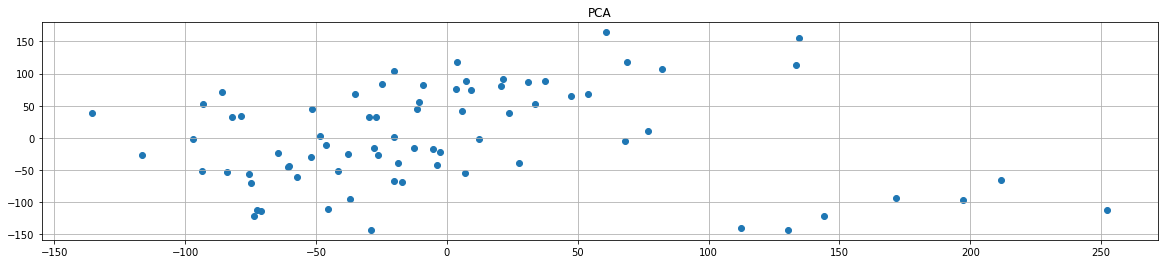

In [146]:
fig = plt.figure(figsize = (20,4) )

#x_train = x_train.fillna(0)
x2 = PCA().fit_transform(x_train)
plt.scatter(x2[:,0],x2[:,1] ) #  , c = y  )
plt.title('PCA')
plt.grid()
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


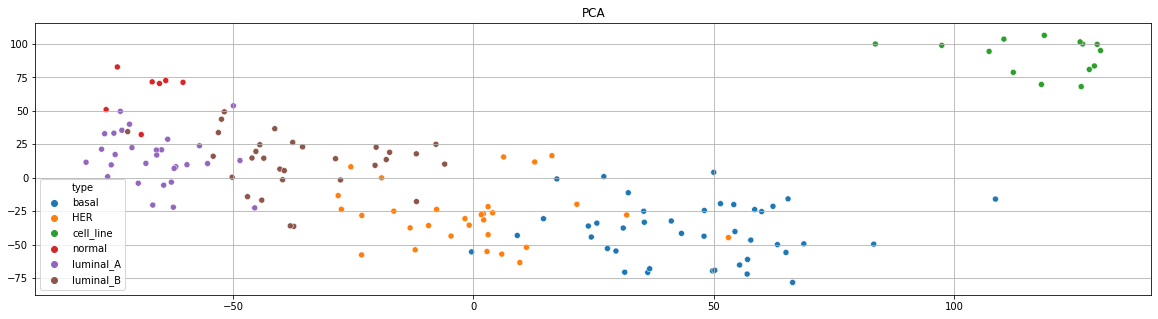

In [147]:
try:
    from sklearn.decomposition import PCA
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    pca = PCA(n_components=2)
    x = pca.fit_transform(x)

    plt.figure(figsize = (20,5))
    sns.scatterplot(x[:,0],x[:,1], hue = y) 
    
    plt.title('PCA')
    plt.grid()
    
except:
    print('Something goes wrong. Probably y is not defined')

In [168]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)

#data_pred = pd.Series(y_pred)
#data_pred

In [169]:
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(cm)
print(acc)

[[12  4  0  0  1  0]
 [ 0 18  0  0  0  0]
 [ 0  0  7  0  0  0]
 [ 0  0  0 15  0  0]
 [ 0  0  0  0 14  0]
 [ 0  0  0  5  0  0]]
0.868421052631579


In [125]:
exp_variance = pca.explained_variance_ratio_

print(exp_variance)

[1.]


In [113]:
pca = PCA(n_components=1)
x_train = pca.fit_transform(x_train)
x_test = pca.fit_transform(x_test)

x_train[:5]

array([[ 4.22344749],
       [-6.97073648],
       [ 6.51917967],
       [ 8.79224947],
       [10.08524737]])

In [ ]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [103]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + accuracy_score(y_test, y_pred))

NameError: name 'y_pred' is not defined

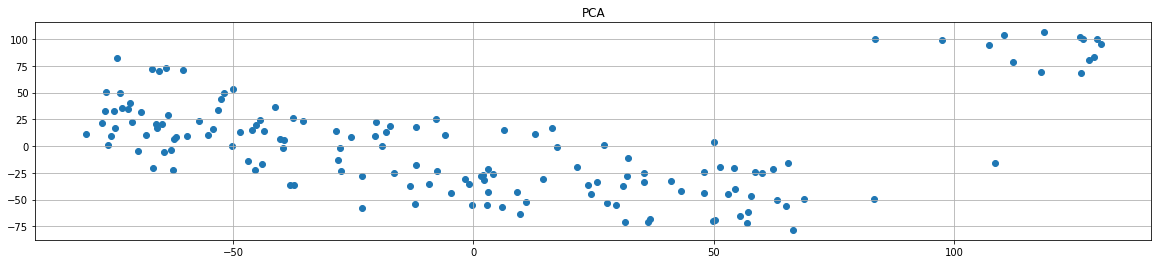

In [79]:
fig = plt.figure(figsize = (20,4) )

x = x.fillna(0)
x2 = PCA().fit_transform(x)
plt.scatter(x2[:,0],x2[:,1] ) #  , c = y  )
plt.title('PCA')
plt.grid()
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


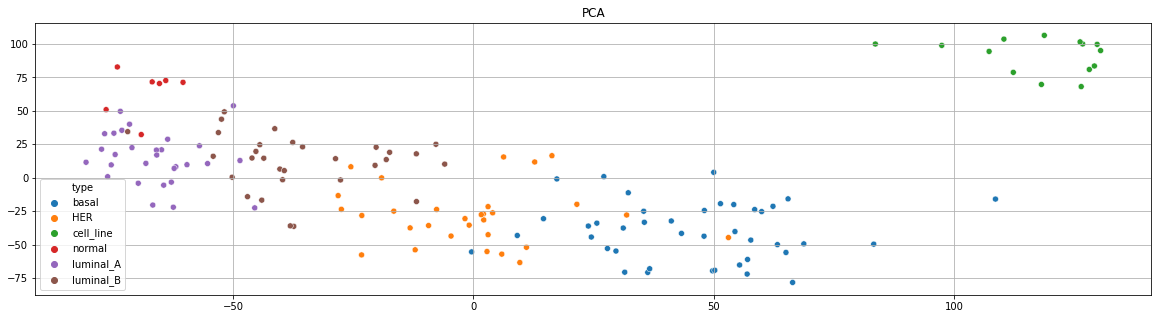

In [80]:
try:
    from sklearn.decomposition import PCA
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    pca = PCA(n_components=2)
    x = pca.fit_transform(x)

    plt.figure(figsize = (20,5))
    sns.scatterplot(x[:,0],x[:,1], hue = y) 
    
    plt.title('PCA')
    plt.grid()
    
except:
    print('Something goes wrong. Probably y is not defined')